## 📐 Evaluation RQ4

Using **ARI (Adjusted Rand Index)** to measure the degree of overlap among the implemented approaches:

**1)** ARI Against the Ground-Truth.

**2)** Pairwise ARI Score.

#### Imports

In [5]:
# Imports
from sklearn.metrics        import adjusted_rand_score
import matplotlib.pyplot    as plt
import matplotlib.ticker    as ticker
import matplotlib.pyplot    as plt
import seaborn              as sns
import pandas               as pd
import numpy                as np
import os

#### Parameters

In [6]:
# Paths
INPUT_PATH = "../../0_Data/CSV/"

# Approaches
APPROACHES = ["1a_React","1d_Sun","4d_AppStrings","4a_AppName","4c_AppRestrictedApi","4b_AppPermissions","4e_AppIcon","4f_AppLibraries"]

In [7]:
# Path
PLOTS_PATH = "./Plots/"

# Create folder for paths
if not os.path.exists(PLOTS_PATH):
    os.makedirs(PLOTS_PATH)
    print("Folder created:", PLOTS_PATH)
else:
    print("Folder already exists:", PLOTS_PATH)

Folder already exists: ./Plots/


### Load Data

In [8]:
appsDF = pd.read_csv(INPUT_PATH + "0_AndroCatSet.csv", index_col=False)
appsDF = appsDF.drop(['pkgName','googlePlayDescription'], axis=1)

# Add all the other approaches
for i in range(0,2):
    inputDF = pd.read_csv(INPUT_PATH + "RQ1/" + APPROACHES[i] + "ClusteringLabels.csv", index_col=False)
    appsDF = pd.concat([appsDF, inputDF['clusterID']], axis=1)
    appsDF = appsDF.rename(columns={'clusterID': APPROACHES[i][3:]})

# Add all the other approaches
for i in range(2,len(APPROACHES)):
    inputDF = pd.read_csv(INPUT_PATH + "RQ4/" + APPROACHES[i] + "ClusteringLabels.csv", index_col=False)
    appsDF = pd.concat([appsDF, inputDF['clusterID']], axis=1)
    appsDF = appsDF.rename(columns={'clusterID': APPROACHES[i][3:]})

### **1)**  ARI Against the Ground-Truth

Compute ARI Score.

In [9]:
# To store ARI Score of each approach
ariScoreList = []

# Get approach List
approachesList = appsDF.columns[3:]

# For each approach compare against ground-truth
for approach in approachesList:
    #Compute the Adjusted Rand Index 
    ariScoreList.append(adjusted_rand_score(appsDF["classID"].values, appsDF[approach].values))

Plot ARI Score

In [10]:
# Plot Parameters
TITLE_FONTSIZE = 18
TICKS_FONTSIZE = 16
AXIS_FONTSIZE  = 18

COLORS = ["#68B984"]*2 + ["#E96479"] * 6

/tmp/ipykernel_2622/538619668.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(ticker.FixedFormatter(xlblsMajor))
/tmp/ipykernel_2622/538619668.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_minor_formatter(ticker.FixedFormatter(xlblsMinor))


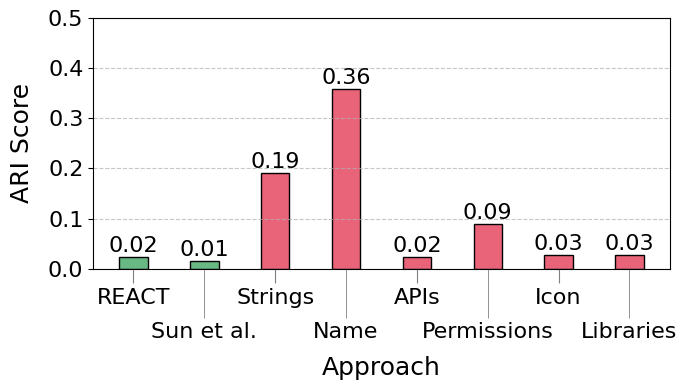

In [11]:

fig, ax = plt.subplots(figsize=(7, 4))  # Create the Axes object 'ax'

plt.bar(approachesList, ariScoreList, edgecolor='black', color=COLORS, width=0.4)

# Labels and Ticks
plt.xlabel('Approach', fontsize=AXIS_FONTSIZE, labelpad=10)
plt.ylabel('ARI Score', fontsize=AXIS_FONTSIZE, labelpad=10)
plt.yticks(fontsize=TICKS_FONTSIZE)

xlblsMajor = ["","REACT", "Strings", "APIs", "Icon"]
xlblsMinor = ["","Sun et al.", "Name", "Permissions", "Libraries"]

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

# Set the major tick labels to xlbls and minor tick labels to empty strings
ax.xaxis.set_major_formatter(ticker.FixedFormatter(xlblsMajor))
ax.xaxis.set_minor_formatter(ticker.FixedFormatter(xlblsMinor))

ax.tick_params(axis='x', which='major', length=10)
ax.tick_params(axis='x', which='minor', length=35)
ax.tick_params(axis='x', which='both', color='grey')
ax.tick_params(axis='x', which='both', labelsize=TICKS_FONTSIZE)

#ax.autoscale(enable=True, axis='x', tight=True)

plt.grid(axis='y', linestyle='--', alpha=0.7)

# add value labels to the top of the bars
for i in range(len(ariScoreList)):
    plt.text(i, ariScoreList[i] + 0.01, "{:.2f}".format(ariScoreList[i]), ha='center', fontsize=TICKS_FONTSIZE)

plt.ylim(0, 0.5)
plt.tight_layout()
plt.savefig(PLOTS_PATH + 'overviewRQ4.png')
plt.savefig(PLOTS_PATH + 'overviewRQ4.pdf')
plt.show()

### **2)** Pairwise ARI Score.

Compute ARI score pairwise.

In [12]:
# Get the approaches
approachesList = appsDF.columns[1:]

# Create a matrix for pairwise comparison
resultDF = pd.DataFrame(columns=approachesList,index=approachesList)

# Pairwise comparison
for i, (index, row) in enumerate(resultDF.iterrows()):
    for j in range(i,len(row)):
        #Compute the Adjusted Rand Index
        ariScore = adjusted_rand_score(appsDF[approachesList[i]].values, appsDF[approachesList[j]].values)
        
        # Store the results
        resultDF.loc[approachesList[i],approachesList[j]] = ariScore
        resultDF.loc[approachesList[j],approachesList[i]] = ariScore

resultDF = resultDF.astype(float)
resultDF

,classID,googlePlayCategoryID,React,Sun,AppStrings,AppName,AppRestrictedApi,AppPermissions,AppIcon,AppLibraries
classID,1.000000,0.328549,0.023005,0.014711,0.190455,0.357702,0.023626,0.088315,0.027970,0.027036
googlePlayCategoryID,0.328549,1.000000,0.012086,0.008525,0.102572,0.145548,0.010417,0.041955,0.012828,0.019012
React,0.023005,0.012086,1.000000,0.045361,0.032093,0.015677,0.049229,0.029775,0.011944,0.051145
Sun,0.014711,0.008525,0.045361,1.000000,0.029516,0.010318,0.031672,0.017697,0.006586,0.035915
AppStrings,0.190455,0.102572,0.032093,0.029516,1.000000,0.094882,0.022171,0.036010,0.011648,0.037982
AppName,0.357702,0.145548,0.015677,0.010318,0.094882,1.000000,0.014095,0.048021,0.020121,0.016710
AppRestrictedApi,0.023626,0.010417,0.049229,0.031672,0.022171,0.014095,1.000000,0.031317,0.011045,0.033951
AppPermissions,0.088315,0.041955,0.029775,0.017697,0.036010,0.048021,0.031317,1.000000,0.012735,0.037867
AppIcon,0.027970,0.012828,0.011944,0.006586,0.011648,0.020121,0.011045,0.012735,1.000000,0.011206
AppLibraries,0.027036,0.019012,0.051145,0.035915,0.037982,0.016710,0.033951,0.037867,0.011206,1.000000
